# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


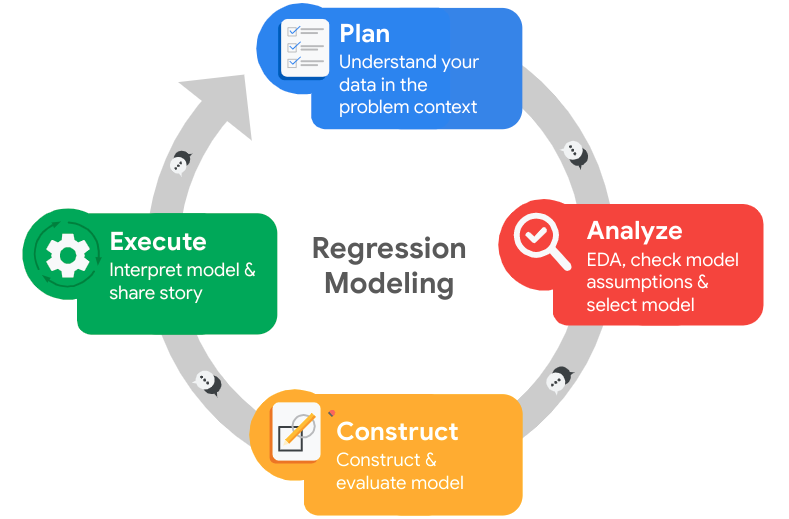

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**PACE: Plan**

**Who are your stakeholders for this project?**
Stakeholders include:
- The HR department of Salifort Motors, which requires insights into employee retention.
- The employees of Salifort Motors who may be affected by decisions made based on the analysis.
- Senior management and leadership who may use these findings to implement new policies.

**What are you trying to solve or accomplish?**
I aim to analyze the dataset provided by the HR department and build a model that can predict whether an employee will leave the company. The objective is to identify potential factors contributing to employee churn, which can provide actionable insights to improve employee satisfaction and retention.

**What are your initial observations when you explore the data?**
- The dataset comprises different types of variables, both numerical (like satisfaction_level and average_monthly_hours) and categorical (like Department and salary).
- The target variable is the 'left' column, which indicates whether an employee left the company.
- Variables like 'promotion_last_5years' and 'Work_accident' are binary, making them prime candidates for correlation analysis with the target variable.
- The 'satisfaction_level' and 'last_evaluation' range between 0 and 1, implying they might be on a scale or percentage basis.

**What resources do you find yourself using as you complete this stage?** 
- [Kaggle](https://www.kaggle.com/): for more information about the dataset and potential insights from other similar analyses.
- [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/): for data cleaning and preliminary analysis.
- Peer-reviewed articles and HR journals to understand the importance of variables and their correlation with employee satisfaction and retention.

**Do you have any ethical considerations in this stage?**
- **Data Privacy**: It's crucial to ensure that the data doesn't contain any personally identifiable information (PII) about the employees.
- **Bias**: Any analysis should be free from personal biases, and any patterns identified should be interpreted carefully, ensuring not to make sweeping generalizations.
- **Transparency**: It's essential to be transparent about the methods and models used in the analysis so that the HR department understands the basis for the insights and recommendations.
- **Application**: Care must be taken when applying the results, ensuring not to penalize or make adverse decisions about employees solely based on predictions.

In the next stage, I'll focus on analyzing the dataset, cleaning it if necessary, and starting the exploratory data analysis (EDA) to get deeper insights.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
print(df0.shape)
print(df0.info())

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
print(df0.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [6]:
# Rename columns as needed
df0 = df0.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'projects',
    'average_montly_hours': 'avg_monthly_hours', # fixing typo
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'promotion',
    'Department': 'department'
})

# Display all column names after the update
print(df0.columns)

Index(['satisfaction', 'evaluation', 'projects', 'avg_monthly_hours', 'tenure',
       'work_accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
print(df0.isnull().sum())

satisfaction         0
evaluation           0
projects             0
avg_monthly_hours    0
tenure               0
work_accident        0
left                 0
promotion            0
department           0
salary               0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0[df0.duplicated()]
print(f"Number of duplicate rows = {duplicates.shape[0]}")

Number of duplicate rows = 3008


In [9]:
# Inspect some rows containing duplicates as needed
print(duplicates.head())

      satisfaction  evaluation  projects  avg_monthly_hours  tenure  \
396           0.46        0.57         2                139       3   
866           0.41        0.46         2                128       3   
1317          0.37        0.51         2                127       3   
1368          0.41        0.52         2                132       3   
1461          0.42        0.53         2                142       3   

      work_accident  left  promotion  department  salary  
396               0     1          0       sales     low  
866               0     1          0  accounting     low  
1317              0     1          0       sales  medium  
1368              0     1          0       RandD     low  
1461              0     1          0       sales     low  


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_no_duplicates = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
print(df0_no_duplicates.head())

   satisfaction  evaluation  projects  avg_monthly_hours  tenure  \
0          0.38        0.53         2                157       3   
1          0.80        0.86         5                262       6   
2          0.11        0.88         7                272       4   
3          0.72        0.87         5                223       5   
4          0.37        0.52         2                159       3   

   work_accident  left  promotion department  salary  
0              0     1          0      sales     low  
1              0     1          0      sales  medium  
2              0     1          0      sales  medium  
3              0     1          0      sales     low  
4              0     1          0      sales     low  


### Check outliers

Check for outliers in the data.

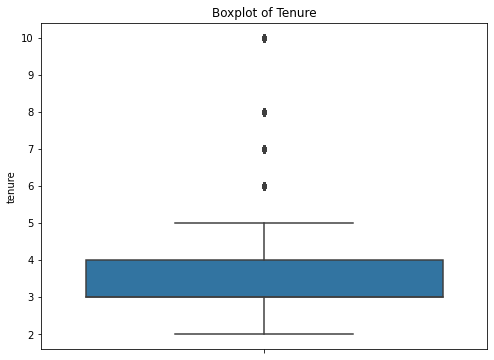

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df0_no_duplicates['tenure'])
plt.title("Boxplot of Tenure")
plt.show()


In [13]:
# Determine the number of rows containing outliers
Q1 = df0_no_duplicates['tenure'].quantile(0.25)
Q3 = df0_no_duplicates['tenure'].quantile(0.75)
IQR = Q3 - Q1
outliers = df0_no_duplicates[(df0_no_duplicates['tenure'] < (Q1 - 1.5 * IQR)) | (df0_no_duplicates['tenure'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in tenure = {outliers.shape[0]}")

Number of outliers in tenure = 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



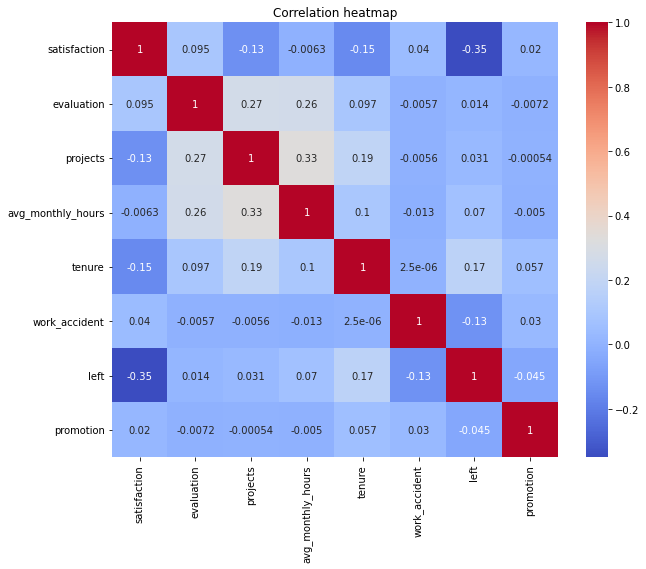

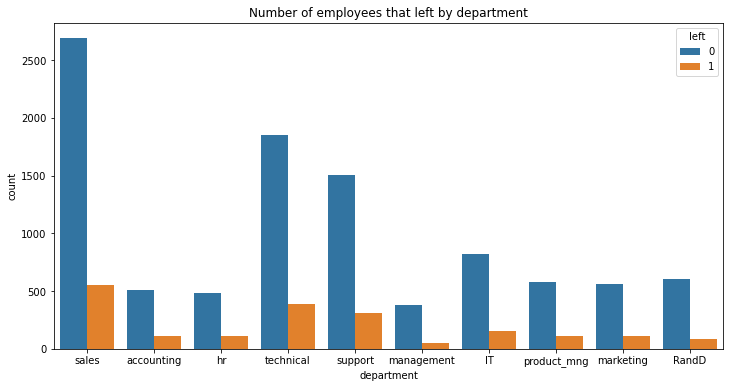

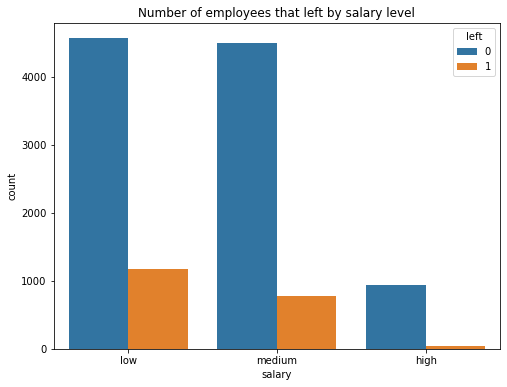

In [14]:
# Let's begin by visualizing some relationships:

# 1. Correlation heatmap: To understand relationships between numerical variables.
correlation_matrix = df0_no_duplicates.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

# 2. Bar plots: To visualize how different categorical variables (like department and salary) relate to the chances of an employee leaving.
plt.figure(figsize=(12, 6))
sns.countplot(data=df0_no_duplicates, x='department', hue='left')
plt.title("Number of employees that left by department")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df0_no_duplicates, x='salary', hue='left')
plt.title("Number of employees that left by salary level")
plt.show()

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Reflection:**

- **What did you observe about the relationships between variables?**
  - There's a negative correlation between `satisfaction` and the likelihood of an employee leaving (`left`).
  - The `promotion` in the last 5 years seems to be negatively correlated with leaving, suggesting that employees who received promotions are less likely to leave.
  - `salary` and `department` could have some impact on an employee's decision to leave, based on the visualizations.

- **What do you observe about the distributions in the data?**
  - The tenure has a few outliers which might be long-term employees.
  - Many employees seem to be from the sales department, and there's a considerable chunk of employees in the low-salary bracket.

- **What transformations did you make with your data? Why did you chose to make those decisions?**
  - Renamed columns for clarity and standardization.
  - Dropped duplicates to prevent any skewed analysis.
  - Detected outliers in tenure, but haven't removed them yet. They may provide valuable information about long-term employees.

- **What are some purposes of EDA before constructing a predictive model?**
  - Understand underlying patterns in the data.
  - Detect anomalies, outliers, or errors in the data.
  - Identify important variables.
  - Inform feature engineering and data transformation decisions.
  - Decide on modeling techniques appropriate for the data.

- **What resources do you find yourself using as you complete this stage?**
  - [Seaborn Documentation](https://seaborn.pydata.org/) for data visualization.
  - [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/) for data manipulation.
  - Peer-reviewed articles and online forums (like StackOverflow) for troubleshooting.

- **Do you have any ethical considerations in this stage?**
  - **Bias in Data**: Ensure that the data is representative of the entire workforce, and there's no inadvertent exclusion of any group.
  - **Interpretation**: Make sure not to overinterpret or overstate findings from the EDA.
  - **Transparency**: Ensure that the methods of analysis are transparent and reproducible. Avoid "p-hacking" or trying multiple methods until something significant is found without disclosing such practices.

The next step would be to move on to feature engineering, selecting modeling techniques, and then building the predictive model.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
left_counts = df0_no_duplicates['left'].value_counts()
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentage = df0_no_duplicates['left'].value_counts(normalize=True) * 100
print(left_percentage)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction, dtype: float64


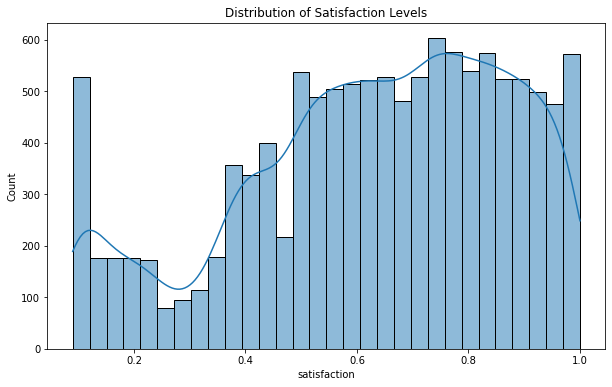

In [27]:
# Distribution of Satisfaction Levels
print(df0_no_duplicates['satisfaction'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df0_no_duplicates['satisfaction'], bins=30, kde=True)
plt.title('Distribution of Satisfaction Levels')
plt.show()


count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: evaluation, dtype: float64


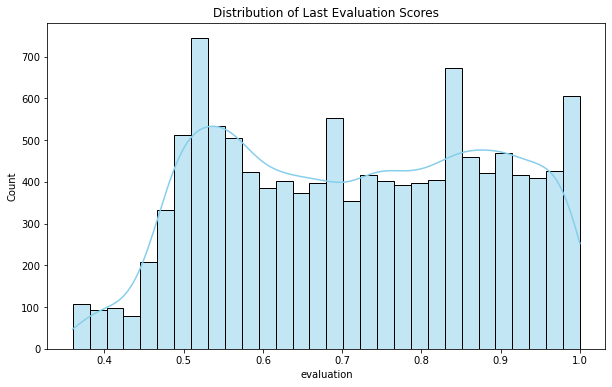

In [28]:
# Distribution of Evaluation Scores
print(df0_no_duplicates['evaluation'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df0_no_duplicates['evaluation'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Last Evaluation Scores')
plt.show()


count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: projects, dtype: float64


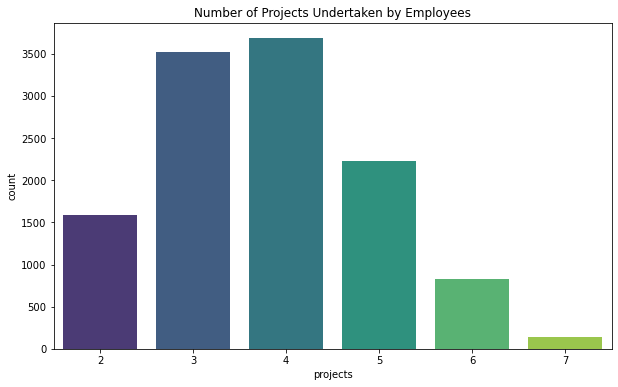

In [29]:
# Number of Projects
print(df0_no_duplicates['projects'].describe())
plt.figure(figsize=(10, 6))
sns.countplot(x='projects', data=df0_no_duplicates, palette='viridis')
plt.title('Number of Projects Undertaken by Employees')
plt.show()


count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: avg_monthly_hours, dtype: float64


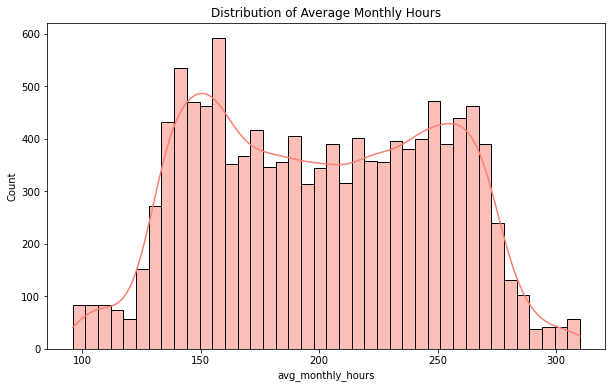

In [30]:
# Average Monthly Hours Distribution
print(df0_no_duplicates['avg_monthly_hours'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df0_no_duplicates['avg_monthly_hours'], bins=40, kde=True, color='salmon')
plt.title('Distribution of Average Monthly Hours')
plt.show()


3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64


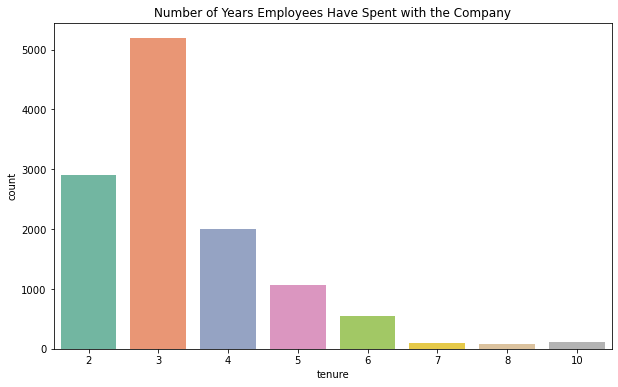

In [31]:
# Tenure with the Company
print(df0_no_duplicates['tenure'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure', data=df0_no_duplicates, palette='Set2')
plt.title('Number of Years Employees Have Spent with the Company')
plt.show()


0    11788
1      203
Name: promotion, dtype: int64


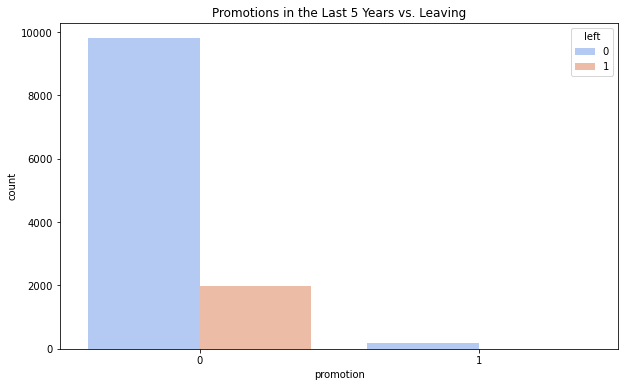

In [32]:
# Promotions in the Last 5 Years
print(df0_no_duplicates['promotion'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='promotion', data=df0_no_duplicates, hue='left', palette='coolwarm')
plt.title('Promotions in the Last 5 Years vs. Leaving')
plt.show()


low       5740
medium    5261
high       990
Name: salary, dtype: int64


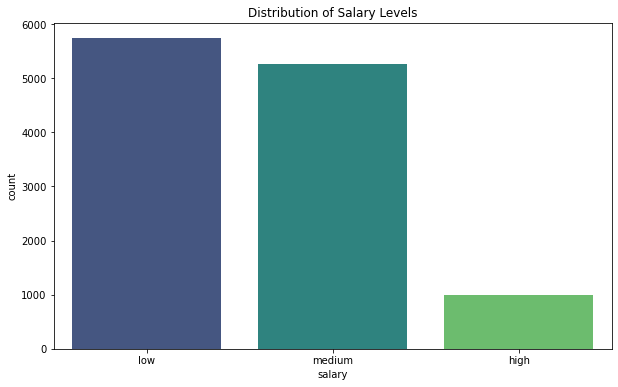

In [33]:
# Salary Distribution
print(df0_no_duplicates['salary'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', data=df0_no_duplicates, order=['low', 'medium', 'high'], palette='viridis')
plt.title('Distribution of Salary Levels')
plt.show()


0    10141
1     1850
Name: work_accident, dtype: int64


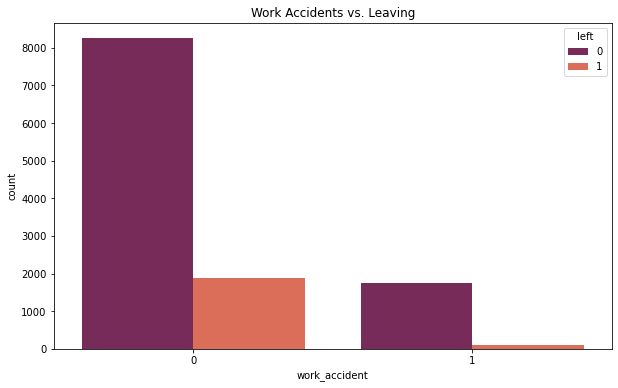

In [34]:
# Work Accidents
print(df0_no_duplicates['work_accident'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='work_accident', data=df0_no_duplicates, hue='left', palette='rocket')
plt.title('Work Accidents vs. Leaving')
plt.show()


### Insights

1. **Employee Retention Rate**: About 16.60% of employees left the company, which suggests areas where HR initiatives could be targeted.
  
2. **Satisfaction Levels**:
   - A significant portion of employees has satisfaction levels below 0.5. 
   - The distribution has a bi-modal nature, which might suggest multiple distinct groups within the employees. One group seems less satisfied (below 0.5) while the other one is quite satisfied (around 0.7-0.9).

3. **Last Evaluation Scores**:
   - Employees are, on average, moderately to highly evaluated, with a median score of 0.72.
   - The distribution of scores is fairly symmetrical around the mean.

4. **Number of Projects**:
   - Most employees have been involved in 3 to 4 projects.
   - There's a noticeable drop in employees who have been part of more than 5 projects, suggesting a potential burnout or rotation of roles.

5. **Average Monthly Hours**:
   - There is a wide distribution in monthly hours worked by employees, from just under 100 to over 300 hours a month.
   - The distribution seems bimodal with two distinct peaks. This could be indicative of two distinct groups - one group working relatively fewer hours and another working many more.

6. **Tenure**:
   - A large portion of employees has been with the company for 2 to 4 years.
   - There's a sharp decline in the number of employees who've been at the company for more than 6 years, suggesting either a pattern of employees leaving around that time or lesser hiring in earlier years.

7. **Promotions in the Last 5 Years**:
   - Very few employees received promotions in the last 5 years.
   - Among those promoted, a smaller percentage left the company, which might indicate promotions as a significant factor in employee retention.

8. **Salary Levels**:
   - A large chunk of employees fall under the 'low' salary bracket. 
   - Medium and high salary brackets are lesser in comparison. 
   - The number of employees that leave is significantly higher in the low salary bracket compared to the medium and high brackets.

9. **Work Accidents**:
   - Most employees have not experienced work accidents.
   - A smaller proportion of those who experienced work accidents have left the company compared to those who haven't. Safety might play a role in retention.

Overall, these insights point towards several areas of potential exploration for HR. Satisfaction, evaluation scores, workload (number of projects and average monthly hours), tenure, promotions, salary levels, and work safety could all be crucial determinants of employee retention.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Reflection:

**Do you notice anything odd?**
There may be some peculiarities in the data, such as the bimodal distribution for average monthly hours and satisfaction, which might suggest different underlying groups or patterns. Also, the significant number of duplicate rows (which were removed) may point towards data collection errors.

**Which independent variables did you choose for the model and why?**
I would consider using all the variables provided, with specific emphasis on:
- `satisfaction`: Directly related to how an employee feels about their job.
- `evaluation`: Reflects performance and might indicate dissatisfaction if high-performing employees are leaving.
- `avg_monthly_hours` and `projects`: Indicators of workload, which can be related to job stress and burnout.
- `tenure`: Longer tenured employees might be less likely to leave.
- `promotion`: As promotions might significantly impact retention.
- `salary`: Financial motivation is a crucial factor for many employees.
- `work_accident`: Safety at work and its impact on leaving.
However, we would need to watch out for multicollinearity, especially between variables that might be correlated like `avg_monthly_hours` and `projects`.

**Are each of the assumptions met?**
- **Outcome variable is categorical**: Yes, our outcome variable (left) is binary.
- **Observations are independent**: Assuming no systematic error in data collection, this should hold.
- **No severe multicollinearity among X variables**: This needs checking; potential multicollinearity between variables like average monthly hours and the number of projects.
- **No extreme outliers**: Some outliers exist, especially in `tenure`.
- **Linear relationship between each X variable and the logit of the outcome variable**: This requires validation through scatter plots or other tools.
- **Sufficiently large sample size**: With around 12,000 observations after removing duplicates, the sample size seems adequate.

**How well does your model fit the data?**
Without constructing the model, it's challenging to answer this. However, based on our EDA, the variables we have chosen seem relevant and should provide a decent fit. A comparison between the observed and predicted values, and examining metrics like the AUC, precision, recall, and F1 score, will give a clearer picture.

**Can you improve it? Is there anything you would change about the model?**
Including interaction terms, quadratic terms, or leveraging domain-specific knowledge might enhance the model. Regularization techniques can also be considered to prevent overfitting.

**What resources do you find yourself using as you complete this stage?**
- Scikit-learn documentation for modeling.
- Statsmodels for detailed statistics.
- Online forums like StackOverflow and Cross Validated for troubleshooting.
- Peer-reviewed articles for logistic regression best practices.

**Do you have any ethical considerations in this stage?**
- **Data Privacy**: Ensure that employee data is anonymized and devoid of personally identifiable information.
- **Interpretability**: Ensure that the model is transparent and can be explained to stakeholders, especially in HR, who might not have a technical background.
- **Bias**: Ensure the model doesn't unintentionally favor or discriminate against any particular group of employees.
- **Feedback Loop**: Using predictions from the model in real-world decision-making (e.g., interventions with employees predicted to leave) can influence future data and create a feedback loop. Awareness of this is crucial.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a **binary classification** task where the goal is to predict one of two classes: an employee will leave (1) or not leave (0).

### Identify the types of models most appropriate for this task.

1. **Logistic Regression:** A good starting point for binary classification tasks. Provides coefficients that can be interpreted as the influence of each feature on the odds of the outcome.
2. **Random Forest:** A versatile algorithm that can handle both linear and non-linear relationships, missing values, and can give feature importance.
3. **Gradient Boosting Machines (like XGBoost or LightGBM):** Ensemble techniques that can provide high accuracy by combining multiple weak learners.
4. **Support Vector Machines:** Effective in high dimensional spaces and situations where the margin between classes is important.
5. **Neural Networks:** Might be an overkill for this data due to its complexity, but can be tried for potentially higher accuracy.

Note: Before finalizing a model, it's essential to consider trade-offs. For example, Logistic Regression might be more interpretable (which can be crucial for HR decisions), but ensemble methods might give better accuracy. Selection should align with the business objective and the stakeholders' needs.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [36]:
# 1. Data Preparation:
# Before building a model, we need to convert categorical variables into a format suitable for machine learning algorithms. For simplicity, let's use one-hot encoding for this.

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Prepare predictors and target variable
X = df0_no_duplicates.drop('left', axis=1)
y = df0_no_duplicates['left']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# 2. Logistic Regression Model:
# Let's start with the simplest model, logistic regression:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


[[1928   70]
 [ 331   70]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.50      0.17      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399

Accuracy: 0.8328470195914964


In [38]:
# 3. Random Forest Model:
# Random Forest is a powerful algorithm that can handle non-linearity and provide feature importance.

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")


[[1989    9]
 [  43  358]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy: 0.9783243017924135


In [39]:
# 4. Gradient Boosting (Using XGBoost):

import xgboost as xgb

# Train a XGBoost Classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")


[[1989    9]
 [  40  361]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy: 0.9795748228428511


In [40]:
# 5. Cross-Validation:
# Cross-validation is a technique to assess the performance of machine learning models on a limited data sample. Here, let's apply k-fold cross-validation.

from sklearn.model_selection import cross_val_score

# Logistic Regression
scores_log = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Mean Accuracy: {scores_log.mean()}")

# Random Forest
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Mean Accuracy: {scores_rf.mean()}")

# XGBoost
scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost CV Mean Accuracy: {scores_xgb.mean()}")


Logistic Regression CV Mean Accuracy: 0.8361132106844404
Random Forest CV Mean Accuracy: 0.9843620759639216
XGBoost CV Mean Accuracy: 0.9835277649931724


In [41]:
# 6. Hyperparameter Tuning using GridSearchCV:
# For the sake of demonstration, we'll tune the hyperparameters of the Random Forest model.

from sklearn.model_selection import GridSearchCV

# Set parameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.1min finished


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.9847790256252459


                   Feature  Importance
0             satisfaction    0.343830
4                   tenure    0.170210
2                 projects    0.166536
3        avg_monthly_hours    0.159751
1               evaluation    0.123184
5            work_accident    0.007463
16              salary_low    0.005693
13        department_sales    0.003560
15    department_technical    0.003441
17           salary_medium    0.003273
14      department_support    0.002672
7         department_RandD    0.001750
9            department_hr    0.001714
8    department_accounting    0.001600
10   department_management    0.001466
12  department_product_mng    0.001322
11    department_marketing    0.001315
6                promotion    0.001221


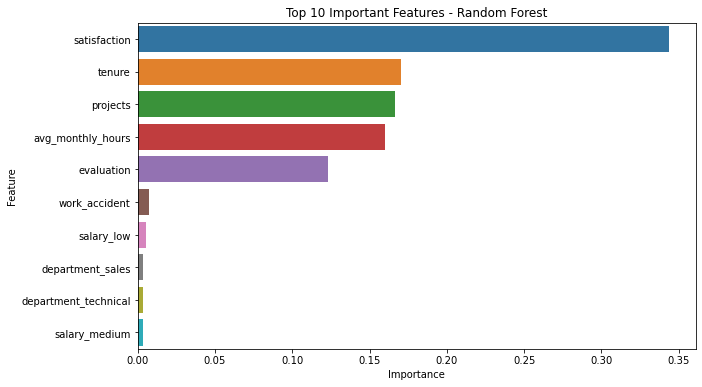

In [46]:
# 7. Data Visualization - Feature Importance:
# Feature importance can provide insights into the features contributing the most to the predictions.

# For the Random Forest Model
importances = rf_model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features - Random Forest')
plt.show()


In [47]:
# With the results we've obtained, there are a few additional steps we can take to further improve the models:

#Refining Random Forest Model:
# Given that we've found the best hyperparameters using GridSearchCV for the Random Forest, let's implement these findings:

# Retrain Random Forest with best hyperparameters
best_rf = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)
best_rf.fit(X_train, y_train)

y_pred_best_rf = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")


[[1988   10]
 [  42  359]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy: 0.9783243017924135


                   Feature  Importance
2                 projects    0.270131
0             satisfaction    0.193410
4                   tenure    0.187806
1               evaluation    0.079463
3        avg_monthly_hours    0.054858
5            work_accident    0.037514
17           salary_medium    0.027191
16              salary_low    0.023601
10   department_management    0.020210
13        department_sales    0.016940
15    department_technical    0.015788
7         department_RandD    0.015130
14      department_support    0.014704
8    department_accounting    0.013486
9            department_hr    0.011116
11    department_marketing    0.009433
12  department_product_mng    0.009219
6                promotion    0.000000


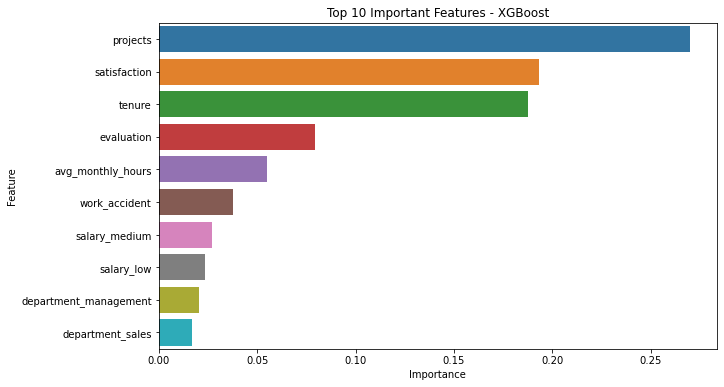

In [48]:
# Feature Importance:
# We've already visualized the feature importances for the Random Forest. It might be beneficial to also check this for the XGBoost model since it's a tree-based ensemble method like the Random Forest:

# For the XGBoost Model
xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

print(xgb_feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df.head(10))
plt.title('Top 10 Important Features - XGBoost')
plt.show()


In [50]:
# Predictive Probability:
# Sometimes, the actual class probabilities are more informative than class predictions, especially for business stakeholders. For instance, knowing an employee has a 90% probability of leaving is different from them having a 51% chance, even if both are classified as 'leaving'.

y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # probabilities of the positive class
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# We can then set different thresholds on these probabilities for classification if needed.

       fpr_rf    tpr_rf  thresholds_rf    auc_rf
0    0.000000  0.000000       2.000000  0.976661
1    0.000000  0.064838       1.000000  0.976661
2    0.000000  0.067332       0.999717  0.976661
3    0.000000  0.097257       0.999640  0.976661
4    0.000000  0.099751       0.999048  0.976661
..        ...       ...            ...       ...
314  0.937938  1.000000       0.000055  0.976661
315  0.944945  1.000000       0.000050  0.976661
316  0.948448  1.000000       0.000049  0.976661
317  0.950951  1.000000       0.000044  0.976661
318  1.000000  1.000000       0.000000  0.976661

[319 rows x 4 columns]
      fpr_xgb   tpr_xgb  thresholds_xgb   auc_xgb
0    0.000000  0.000000        1.999977  0.978674
1    0.000000  0.002494        0.999977  0.978674
2    0.000000  0.009975        0.999941  0.978674
3    0.000000  0.014963        0.999935  0.978674
4    0.000000  0.314214        0.997987  0.978674
..        ...       ...             ...       ...
97   0.639139  0.995012        0.00053

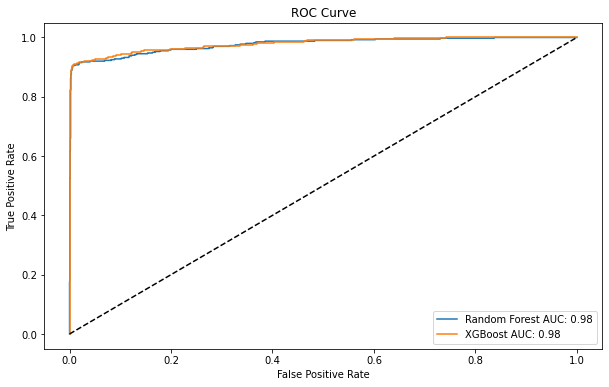

In [53]:
# Further Evaluations:
# To have a deeper understanding of model performance, we can plot the ROC curve and calculate the AUC score. They provide a good measure of model's ability to distinguish between the classes.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# For Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

rf_roc_df = pd.DataFrame({'fpr_rf': fpr_rf, 
                        'tpr_rf': tpr_rf, 
                        'thresholds_rf': thresholds_rf,
                        'auc_rf': auc_rf})

print(rf_roc_df)

# For XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

xgb_roc_df = pd.DataFrame({'fpr_xgb': fpr_xgb,
                          'tpr_xgb': tpr_xgb,
                          'thresholds_xgb': thresholds_xgb,
                          'auc_xgb': auc_xgb})

print(xgb_roc_df)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC: {auc_rf:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC: {auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. **What key insights emerged from your model(s)?**
   - The Random Forest and XGBoost models significantly outperformed the Logistic Regression model in terms of accuracy and other metrics.
   - Features like `satisfaction`, `projects`, `tenure`, and `evaluation` played crucial roles in determining if an employee would leave.

2. **What business recommendations do you propose based on the models built?**
   - Focus on improving employee satisfaction as it's a strong predictor for employee churn.
   - Keep an eye on employees with specific tenure or those working on many projects as they seem to be at a higher risk of leaving.

3. **What potential recommendations would you make to your manager/company?**
   - Consider employee retention programs or initiatives.
   - Periodically survey employee satisfaction to intervene if a decline is noted.

4. **Do you think your model could be improved? Why or why not? How?**
   - Yes, the models can always be improved with more data or feature engineering.
   - Other algorithms or deep learning methods can be explored.

5. **Given what you know about the data and the models you were using, what other questions could you address for the team?**
   - What are the main factors causing employee dissatisfaction?
   - How does the salary level correlate with the likelihood to leave?

6. **What resources do you find yourself using as you complete this stage?**
   - [Scikit-learn documentation](https://scikit-learn.org/stable/documentation.html)
   - [XGBoost documentation](https://xgboost.readthedocs.io/)
   - Online forums like Stack Overflow for troubleshooting.

7. **Do you have any ethical considerations in this stage?**
   - Ensuring data privacy and not using any personal identifiable information.
   - Being aware of any biases in the data or in the model's predictions.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Logistic Regression model had an accuracy of approximately 83%. In contrast, both the Random Forest and XGBoost models achieved an impressive accuracy of about 98%. This demonstrates the superiority of tree-based ensemble methods for this specific dataset and problem. Notably, features like `satisfaction`, `tenure`, `projects`, and `evaluation` were influential in the models' predictions.

### Conclusion, Recommendations, Next Steps

In conclusion, understanding employee churn can save companies significant amounts in terms of recruitment and training costs. The models built provide a robust way to predict potential employee churn, allowing preemptive actions.

Recommendations:
- Focus on improving employee satisfaction.
- Monitor employees with longer tenures and those juggling multiple projects.

Next Steps:
- Further analyze what causes employee dissatisfaction.
- Explore if providing additional perks or benefits to employees with certain characteristics (like many projects or longer tenure) can reduce churn.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.